<a href="https://colab.research.google.com/github/Sathya-marasinghe/My_Projects/blob/main/Copy_of_BloodCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHEST CANCER CONFIRMATION MODEL**

In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

**Import Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import opendatasets as od
import time

**Import Dataset -Chest CT-Scan Dataset**

In [ ]:
od.download("https://www.kaggle.com/datasets/raidaalotaibi/cheast-ctscan-use-data-augmentation")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sathyamarasinghe
Your Kaggle Key: ··········


100%|██████████| 473M/473M [00:05<00:00, 92.8MB/s]


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [ ]:
train_data_dir = "/content/cheast-ctscan-use-data-augmentation/archive-new/Data-new/test"
test_data_dir = "/content/cheast-ctscan-use-data-augmentation/archive-new/Data-new/train"
validation_data_dir = "/content/cheast-ctscan-use-data-augmentation/archive-new/Data-new/valid"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMAGE_SIZE ,
                                                          )

Found 1313 files belonging to 4 classes.


In [ ]:
test_data_dir = tf.keras.utils.image_dataset_from_directory (test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE,
                                                              )


Found 2505 files belonging to 4 classes.


In [ ]:
validation_data = tf.keras.utils.image_dataset_from_directory(validation_data_dir,
                                                              batch_size = BATCH_SIZE,
                                                              image_size = IMAGE_SIZE ,
                                                               )

Found 364 files belonging to 4 classes.


In [ ]:
class_names = train_data.class_names
class_names

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [ ]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


**Plot data sample**

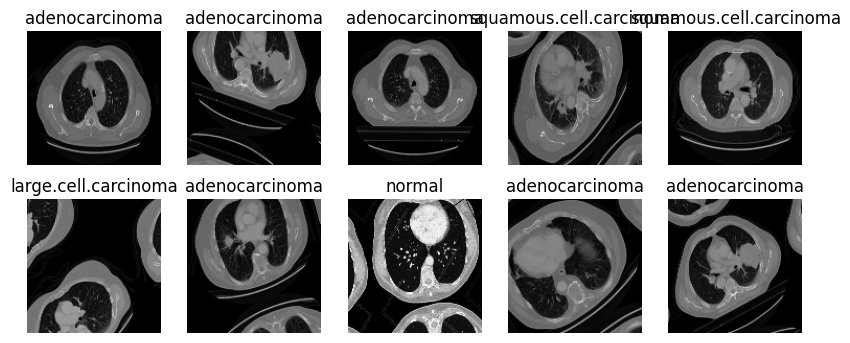

In [ ]:
plt.figure(figsize = (10,4))
for image, label in train_data.take(1):
  for i in range (10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [ ]:
for image, label in train_data.take(1):
   for i in range (1):
    print(image)

tf.Tensor(
[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [3.83911133e-02 3.83911133e-02 3.83911133e-02]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[3.98437500e-01 3.98437500e-01 3.98437500e-01]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  ...

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0

In [ ]:
train_data = train_data.map(lambda x,y : (x/255,y))
validation_data = train_data.map(lambda x,y : (x/255,y))
test_data = train_data.map(lambda x,y : (x/255,y))

In [ ]:
for image, label in train_data.take(1):
   for i in range (1):
    print(image)

tf.Tensor(
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.      

In [ ]:
data_augmentation = tf.keras.Sequential(
    [tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
      tf.keras.layers.RandomZoom(0.2),
     ]
)

**Transfer Learning**

In [ ]:
pretrained_model = tf.keras.applications.Xception(
    include_top = False,
    input_shape = (128,128,3),
    weights = "imagenet",
    pooling = max
)

In [ ]:
for layer in pretrained_model.layers:
  layer.trainable = False

In [ ]:
model = tf.keras.models.Sequential()
model.add(data_augmentation)

model.add(pretrained_model)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=1,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))

model.add(tf.keras.layers.Conv2D(128,kernel_size=1,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 32)       

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['Accuracy'])

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
start_time = time.time()

history= model.fit(train_data,
                    epochs= 10,
                    validation_data=validation_data)

end_time = time.time()



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


41/42 [============================>.] - ETA: 12s - loss: 0.0000e+00 - Accuracy: 0.1662

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(1, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


42/42 [==============================] - 620s 15s/step - loss: 0.0000e+00 - Accuracy: 0.1660 - val_loss: 0.0000e+00 - val_Accuracy: 0.1660
Epoch 2/10
42/42 [==============================] - 622s 15s/step - loss: 0.0000e+00 - Accuracy: 0.1660 - val_loss: 0.0000e+00 - val_Accuracy: 0.1660
Epoch 3/10
42/42 [==============================] - 623s 15s/step - loss: 0.0000e+00 - Accuracy: 0.1660 - val_loss: 0.0000e+00 - val_Accuracy: 0.1660
Epoch 4/10
42/42 [==============================] - 558s 13s/step - loss: 0.0000e+00 - Accuracy: 0.1660 - val_loss: 0.0000e+00 - val_Accuracy: 0.1660
Epoch 5/10
19/42 [============>.................] - ETA: 4:17 - loss: 0.0000e+00 - Accuracy: 0.1464

KeyboardInterrupt: 

In [ ]:
history.history


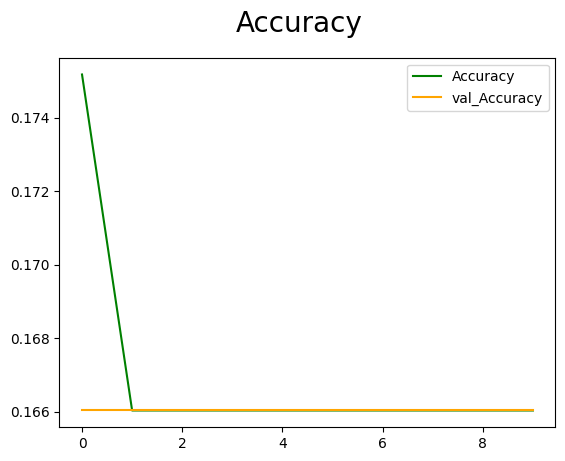

In [ ]:
fig = plt.figure()

# Check if 'accuracy' and 'val_accuracy' keys exist in history.history
if 'Accuracy' in history.history:
    plt.plot(history.history['Accuracy'], color='green', label='Accuracy')
if 'val_Accuracy' in history.history:
    plt.plot(history.history['val_Accuracy'], color='orange', label='val_Accuracy')

fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()


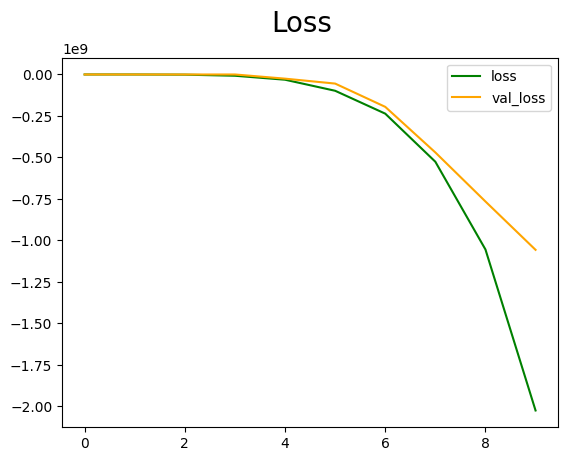

In [ ]:
fig = plt.figure()


if 'loss' in history.history:
    plt.plot(history.history['loss'], color='green', label='loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], color='orange', label='val_loss')

fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.CategoricalAccuracy()

AttributeError: module 'keras.api._v2.keras.metrics' has no attribute 'CatagoricalAccuracy'

In [ ]:
for batch in test_data.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 77ms/step


In [ ]:
precision.result()
recall.result()
accuracy.result()


<tf.Tensor: shape=(), dtype=float32, numpy=0.16603199>